# XAS Simulator
### Using Quanty

In [1]:
ion = 'Ni'  # Ion Name
ch = 2  # Charge
beta = 0.8  # Beta
Dq = 1.0  # 10Dq
mag_field = [0, 0, 0]
exchange_field = [0, 0, 0.1]
temperature = 1.0  # T (K)

In [2]:
from xas_simulator_module.XMCD_src2 import XAS_Lua
from xas_simulator_module.params_short import parameters, xray_data

# DEFAULT_QUANTY_PATH = '/scratch/grp66007/software/xmcd_beamline_simulator/quanty_lin/Quanty'
DEFAULT_QUANTY_PATH = r"C:\Users\grp66007\Documents\quanty\quanty_win\QuantyWin64.exe"


# Check ion
if ion not in parameters or ion not in xray_data['elements']:
    message = f"Ion '{ion}' not available. Available ions are:\n"
    message += ', '.join(parameters)
    raise Exception(message)

# Check charge
ch_str = f"{abs(ch)}+" if ch > 0 else f"{abs(ch)}-"
if ch_str not in xray_data['elements'][ion]['charges']:
    message = f"Ionic charge: '{ion}{ch_str}' is not available.\nAvailable charges for {ion} are:\n"
    message += ','.join(xray_data['elements'][ion]['charges'].keys())
    raise Exception(message)

# build parameters
calculation_parameters = {
    'Nelec': parameters[ion]['Nelec'],
    'H_atomic': 1,
    'H_crystal_field': 1,
    'H_3d_ligands_hybridization_lmct': 0,
    'H_3d_ligands_hybridization_mlct': 0,
    'H_magnetic_field': 1,
    'H_exchange_field': 1,
    'Bx_i': mag_field[0],
    'By_i': mag_field[1],
    'Bz_i': mag_field[2],
    'Bx_f': mag_field[0],
    'By_f': mag_field[1],
    'Bz_f': mag_field[2],
    'Hx_i': exchange_field[0],
    'Hy_i': exchange_field[1],
    'Hz_i': exchange_field[2],
    'Hx_f': exchange_field[0],
    'Hy_f': exchange_field[1],
    'Hz_f': exchange_field[2],
    'T': temperature,
}



Writable TEMPDIR = C:\Users\grp66007\AppData\Local\Temp


In [3]:
simulation = XAS_Lua(
    ion=ion,
    symm='Oh',
    charge=ch_str,
    params=calculation_parameters,
    params_json=xray_data,
    quanty_path=DEFAULT_QUANTY_PATH,
)
simulation.write_header()
simulation.H_init()
simulation.setH_terms()
simulation.set_electrons()
simulation.define_atomic_term()
simulation.define_Oh_crystal_field_term()
simulation.define_external_field_term()
simulation.setTemperature()
simulation.setRestrictions()
simulation.set_iterative_solver()
simulation.set_spectra_functions()
simulation.define_transitions([0, 0, 1], [0, 1, 0], [1, 0, 0])
simulation.set_spectra_lists()
# make and use a tmp directory
simulation.calculate_and_save_spectra()
simulation.run()  # run quanty!
print(simulation.result.stdout)


3d8 2p5,3d9
====    written by Maurits W. Haverkort,                 ====
====    Yi Lu, Robert Green, Sebastian Macke,            ====
====    Marius Retegan, Martin Brass, and Simon Heinze   ====
====    (cc) 1995 - 2022 code and binaries released      ====
====    under creative commons CC-BY lisence             ====
====    www.quanty.org                                   ====
====    Beta version, be critical and report errors!!!   ====
====    Version 0.7 beta                                 ====
====            compiled at: Oct  7 2022 at 10:09:06     ====
====    When used in scientific publications please cite ====
====    one of the following papers as appropriate with  ====
====    respect to the methods used in your publication: ====
====    Phys. Rev. B 85, 165113 (2012)                   ====
====    Phys. Rev. B 90, 085102 (2014)                   ====
====    Euro Phys. Lett. 108, 57004 (2014)               ====
====    J. of Phys.: Conf. Series 712, 012001 (2016)     =

1025 1025
Theoretical values (Quanty):


L$_z$,S$_{eff}$,S$_{z}$,T$_{z}$
-0.3189,-0.9977,-0.9941,-0.0036


Sum rules :


sL$_z$,sS$_{eff}$
0.318881,-0.918627


Sum rules 0:


s$_0$L$_z$,s$_0$S$_{eff}$
0.318876,-0.918612


Deviations:


$\Delta$XAS (%),$\Delta$L$_{z}$ (%),$\Delta$S$_{eff}$ (%),$\Delta_0$L$_{z}$ (%),$\Delta_0$S$_{eff}$ (%)
0.00311034,-0.00609369,-7.92555,-0.00764874,-7.92698


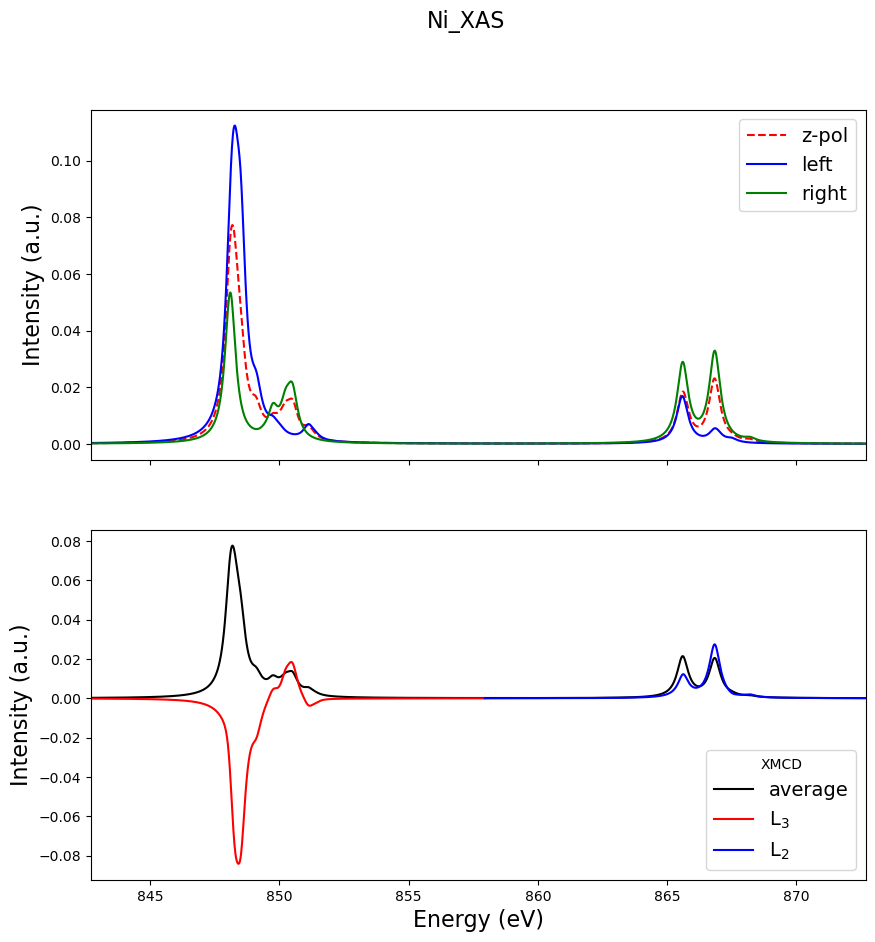

In [4]:
simulation.treat_output()
simulation.post_proc()